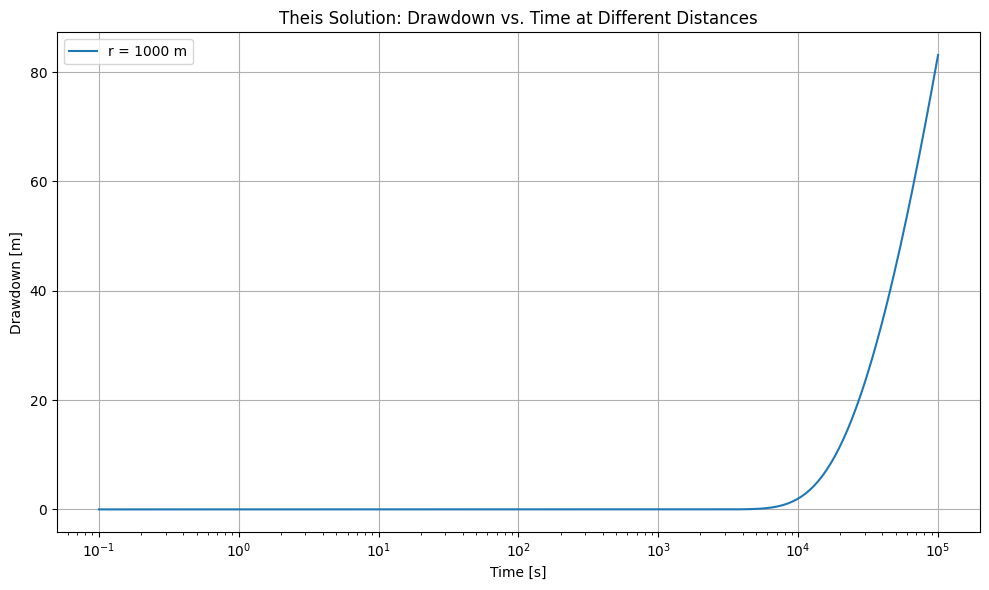

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import expi

def theis_drawdown(Q, T, S, r, t):
    """
    Compute drawdown s(r, t) using the Theis solution.

    Parameters:
    - Q: Pumping rate [m^3/s]
    - T: Transmissivity [m^2/s]
    - S: Storativity (dimensionless)
    - r: Radial distance from well [m]
    - t: Array of times [s]

    Returns:
    - s: Array of drawdown values at each time
    """
    u = (r**2 * S) / (4 * T * t)
    W = -expi(-u) # Well function W(u)
    s = (Q / (4 * np.pi * T)) * W
    return s

# Parameters
Q = 1.0 # m^3/s
T = 1e-3 # m^2/s
S = 1e-4 # dimensionless
r_values = [10, 100, 1000] # meters
t = np.logspace(-1, 5, 400) # seconds

# Plotting
plt.figure(figsize=(10, 6))
for r in r_values:
    s = theis_drawdown(Q, T, S, r, t)
plt.plot(t, s, label=f"r = {r} m")

plt.xscale('log')
plt.xlabel('Time [s]')
plt.ylabel('Drawdown [m]')
plt.title('Theis Solution: Drawdown vs. Time at Different Distances')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
